## Estimateur du maximum de vraisemblance

Soit $X_1, \ldots, X_n$ un échantillon de normale $X\sim \mathcal{N}(\theta,\theta^2)$ où $\theta$ est un réel strictement positif. Nous voulons estimer $\theta$ à partir d'une réalisation de cet échantillon $x=(x_1, \ldots, x_n)$ de $X$.

**Ex1** Donner une expression explicite de l'estimateur du maximum de vraisemblance pour $\theta$.

$$ \hat{\theta}_n^{MV} = \hat{\theta}_n^{MV}(X_1,...,X_n) = ?$$

**Fonction de vraisemblance :**

Soit $X_1, \ldots, X_n \sim \mathcal{N}(\theta, \theta^2)$ indépendants. La densité de chaque $X_i$ est :

$$f(x_i; \theta) = \frac{1}{\sqrt{2\pi} \theta} \exp\left( -\frac{(x_i - \theta)^2}{2\theta^2} \right)$$

Donc la **fonction de vraisemblance** est :

$$L(X_1,...,X_n,\theta) = \prod_{i=1}^n f(x_i; \theta) = \left( \frac{1}{\sqrt{2\pi} \theta} \right)^n \exp\left( -\frac{1}{2\theta^2} \sum_{i=1}^n (x_i - \theta)^2 \right)$$

Donc la **log-vraisemblance** est : 

$$\ell(X_1,...,X_n,\theta) = -n \log(\sqrt{2\pi}\theta) - \frac{1}{2\theta^2} \sum_{i=1}^n (x_i - \theta)^2 = -n \log(\sqrt{2\pi}\theta) - \frac{1}{2\theta^2}(\sum_{i=1}^n x_i^2-2\sum_{i=1}^n x_i\theta+n\theta^2)$$

La dérivée de cette expression doit être nulle pour trouver le **maximum de vraisemblance**, donc on doit résoudre : 

$$-\frac{n}{\theta} + \frac{1}{\theta^{3}} \sum_{i=1}^n x_i^2 - \frac{1}{\theta^2}\sum_{i=1}^n x_i=0$$ 
$$n\theta^2 + \theta \sum_{i=1}^n x_i - \sum_{i=1}^n x_i^2 = 0$$

**Estimateur du maximum de vraisemblance :**

$$\boxed{ \hat{\theta}_n^{MV} = \frac{\sum_{i=1}^n X_i + \sqrt{ \left( \sum_{i=1}^n X_i \right)^2 - 4n^2 } }{2n} }$$

**Ex2.** Simuler un échantillon i.i.d de $X$ de taille $n=50$ avec $\theta =1$ en utilisant `rnorm` et donner une estimation de $\theta$ obtenue par les calculs dans l'**Ex1**. Que remarquez-vous ?

In [36]:
n <- 50
theta <- 1
x <- rnorm(n, mean = theta, sd = theta^2)

S <- sum(x)
theta_MV <- (S + sqrt(S^2 - 4 * n^2)) / (2 * n)
theta_MV

Warning message in sqrt(S^2 - 4 * n^2):
“NaNs produced”


[1] NaN

On remarque que **l'expression sous la racine peut être négative** donc il y a un problème si l'on ne le vérifie pas : “NaNs produced”

**Ex3.** Créer une fonction de vraisemblance ou log de la vraisemblace, nommée `L_norm`, en fonction de $(\theta, x)$, qui donne la vraisemblance d'un échantillon $x=(x_1,\ldots,x_n)$ pour une valeur donnée de $\theta$.

In [37]:
L_norm <- function(x, theta) {
  if (theta <= 0) return(-Inf) # utile pour la question 5, sinon on obtient Nans
  n <- length(x)
  sum_2 <- sum((x - theta)^2)
  log_vraisemblance <- -n * log(theta) - (1 / (2 * theta^2)) * sum_2 # en supposant theta strictement positif
  return(log_vraisemblance)
}

**Ex4.**. Pour l'échantillon généré dans l'**Ex2**, calculer la vraisemblance de cet échantillon des normales de paramètre $\theta$ (le range des valeurs de $\theta$ à votre choix). Tracer la courbe des valeurs calculées en fonction de $\theta$. Que remarquez-vous?

[1] -104.79815  -98.90598  -93.43425  -88.34908  -83.61983  -79.21874
  [7]  -75.12058  -71.30244  -67.74342  -64.42449  -61.32824  -58.43876
 [13]  -55.74144  -53.22293  -50.87092  -48.67412  -46.62212  -44.70532
 [19]  -42.91487  -41.24259  -39.68091  -38.22283  -36.86186  -35.59197
 [25]  -34.40757  -33.30347  -32.27482  -31.31714  -30.42621  -29.59815
 [31]  -28.82928  -28.11621  -27.45575  -26.84491  -26.28091  -25.76113
 [37]  -25.28312  -24.84459  -24.44337  -24.07745  -23.74492  -23.44399
 [43]  -23.17298  -22.93029  -22.71445  -22.52405  -22.35775  -22.21430
 [49]  -22.09254  -21.99133  -21.90964  -21.84646  -21.80085  -21.77192
 [55]  -21.75883  -21.76079  -21.77704  -21.80685  -21.84956  -21.90452
 [61]  -21.97112  -22.04878  -22.13695  -22.23512  -22.34277  -22.45945
 [67]  -22.58471  -22.71811  -22.85926  -23.00776  -23.16326  -23.32540
 [73]  -23.49386  -23.66830  -23.84844  -24.03399  -24.22467  -24.42022
 [79]  -24.62039  -24.82494  -25.03365  -25.24631  -25.46270  -25.68262
 [85]  -25.90590  -26.13235  -26.36179  -26.59407  -26.82903  -27.06652
 [91]  -27.30639  -27.54851  -27.79275  -28.03898  -28.28709  -28.53695
 [97]  -28.78847  -29.04152  -29.29603  -29.55188  -29.80899

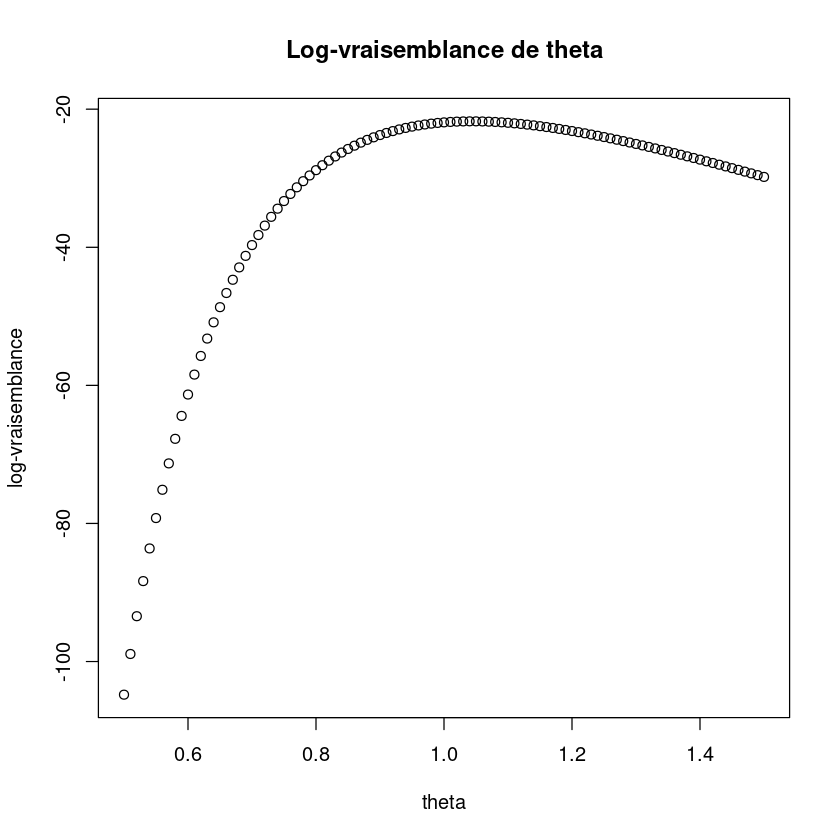

In [41]:
thetavec = seq(0.5,1.5,by=0.01)
L = sapply(thetavec, L_norm, x=x)
L
plot(thetavec, L, xlab="theta", ylab="log-vraisemblance", main="Log-vraisemblance de theta")

Après avoir testé plusieurs valeurs de bornes, on a trouvé les bornes optimales entre $0,5$ et $1,5$

**Ex5.**. En utilisant la fonction `optim` de R, trouvez la valeur de $\theta$ la plus probable d'avoir généré cet échantillon.

In [ ]:
mL_norm <- function(x,theta){ -L_norm(x,theta) } # j'ai inversé le sens des arguments pour correspondre à ma fonction L_norm
## optimization standard (minimization)
p0 = 1 # valueur initiale pour l'algorithme
res = optim(p0, mL_norm, x=x, method = "Brent", lower = 0.5, upper = 1.5)
res

$par
[1] 1.043648

$value
[1] 21.75785

$counts
function gradient 
      NA       NA 

$convergence
[1] 0

$message
NULL

**Ex6.** Faire varier les échantillons de taille $n$ allant de $n=10$ à $n=2000$ et comparer l'écart entre la valeur théorique attendue, l'estimation obtenue dans l'**Ex1** et la valeur obtenue par `optim`. Que remarquez-vous? Sont-ils constistents ?

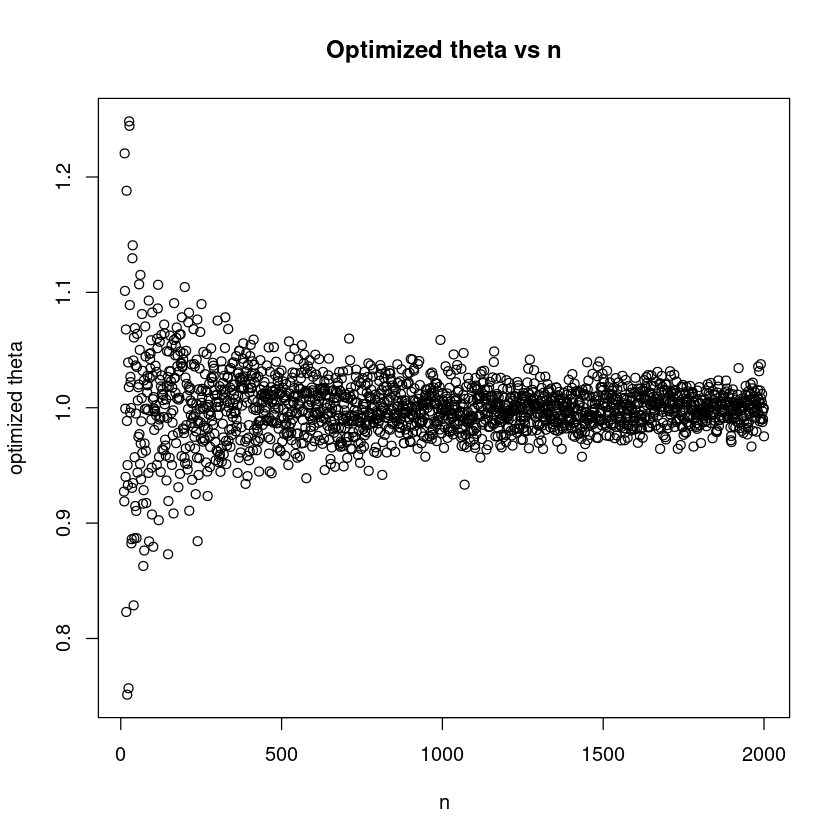

In [48]:
for (i in 10:2000) {
    n <- i
    theta <- 1
    x <- rnorm(n, mean = theta, sd = theta^2)
    p0=1
    res[i] <- optim(p0, mL_norm, x=x, method = "Brent", lower = 0.5, upper = 1.5)$par
}
plot(seq(10, 2000, by = 1), res[10:2000], xlab="n", ylab="optimized theta", main="Optimized theta vs n")

On remarque que plus $n$ augmente, plus le $\theta$ optimal tend vers $1$, et plus le résultat est consistant : l'estimateur converge absolument en loi vers le paramètre $\theta=1$.

## Information de Fisher et l'Intervalle de confiance

On se rappelle que l'Information de Fisher associée au modèle au point $\theta$ est
$$I(\theta) = \mathbb{E}_\theta\left[ \left(\nabla_\theta\mathcal{L}(X;\theta)\right)^2\right] = - \mathbb{E}_\theta\left[\nabla_\theta^2\mathcal{L}(X;\theta)\right].$$

**Ex7.** Montrer théoriquement que $I(\theta) = \frac{3}{\theta^2}$.


**Ex8.** Faire un histogramme de $\sqrt{nI(\theta)}(\hat{\theta}_n^{MV} - \theta)$ et superposer la denstité théorique de la loi normale standard sur l'histogramme. Expliquer les plots obtenus.

[1]   10   11   12   13   14   15   16   17   18   19   20   21   22   23
  [15]   24   25   26   27   28   29   30   31   32   33   34   35   36   37
  [29]   38   39   40   41   42   43   44   45   46   47   48   49   50   51
  [43]   52   53   54   55   56   57   58   59   60   61   62   63   64   65
  [57]   66   67   68   69   70   71   72   73   74   75   76   77   78   79
  [71]   80   81   82   83   84   85   86   87   88   89   90   91   92   93
  [85]   94   95   96   97   98   99  100  101  102  103  104  105  106  107
  [99]  108  109  110  111  112  113  114  115  116  117  118  119  120  121
 [113]  122  123  124  125  126  127  128  129  130  131  132  133  134  135
 [127]  136  137  138  139  140  141  142  143  144  145  146  147  148  149
 [141]  150  151  152  153  154  155  156  157  158  159  160  161  162  163
 [155]  164  165  166  167  168  169  170  171  172  173  174  175  176  177
 [169]  178  179  180  181  182  183  184  185  186  187  188  189  190  191
 [183]  192  193  194  195  196  197  198  199  200  201  202  203  204  205
 [197]  206  207  208  209  210  211  212  213  214  215  216  217  218  219
 [211]  220  221  222  223  224  225  226  227  228  229  230  231  232  233
 [225]  234  235  236  237  238  239  240  241  242  243  244  245  246  247
 [239]  248  249  250  251  252  253  254  255  256  257  258  259  260  261
 [253]  262  263  264  265  266  267  268  269  270  271  272  273  274  275
 [267]  276  277  278  279  280  281  282  283  284  285  286  287  288  289
 [281]  290  291  292  293  294  295  296  297  298  299  300  301  302  303
 [295]  304  305  306  307  308  309  310  311  312  313  314  315  316  317
 [309]  318  319  320  321  322  323  324  325  326  327  328  329  330  331
 [323]  332  333  334  335  336  337  338  339  340  341  342  343  344  345
 [337]  346  347  348  349  350  351  352  353  354  355  356  357  358  359
 [351]  360  361  362  363  364  365  366  367  368  369  370  371  372  373
 [365]  374  375  376  377  378  379  380  381  382  383  384  385  386  387
 [379]  388  389  390  391  392  393  394  395  396  397  398  399  400  401
 [393]  402  403  404  405  406  407  408  409  410  411  412  413  414  415
 [407]  416  417  418  419  420  421  422  423  424  425  426  427  428  429
 [421]  430  431  432  433  434  435  436  437  438  439  440  441  442  443
 [435]  444  445  446  447  448  449  450  451  452  453  454  455  456  457
 [449]  458  459  460  461  462  463  464  465  466  467  468  469  470  471
 [463]  472  473  474  475  476  477  478  479  480  481  482  483  484  485
 [477]  486  487  488  489  490  491  492  493  494  495  496  497  498  499
 [491]  500  501  502  503  504  505  506  507  508  509  510  511  512  513
 [505]  514  515  516  517  518  519  520  521  522  523  524  525  526  527
 [519]  528  529  530  531  532  533  534  535  536  537  538  539  540  541
 [533]  542  543  544  545  546  547  548  549  550  551  552  553  554  555
 [547]  556  557  558  559  560  561  562  563  564  565  566  567  568  569
 [561]  570  571  572  573  574  575  576  577  578  579  580  581  582  583
 [575]  584  585  586  587  588  589  590  591  592  593  594  595  596  597
 [589]  598  599  600  601  602  603  604  605  606  607  608  609  610  611
 [603]  612  613  614  615  616  617  618  619  620  621  622  623  624  625
 [617]  626  627  628  629  630  631  632  633  634  635  636  637  638  639
 [631]  640  641  642  643  644  645  646  647  648  649  650  651  652  653
 [645]  654  655  656  657  658  659  660  661  662  663  664  665  666  667
 [659]  668  669  670  671  672  673  674  675  676  677  678  679  680  681
 [673]  682  683  684  685  686  687  688  689  690  691  692  693  694  695
 [687]  696  697  698  699  700  701  702  703  704  705  706  707  708  709
 [701]  710  711  712  713  714  715  716  717  718  719  720  721  722  723
 [715]  724  725  726  727  728  729  730  731  732  733  734  735  736  737

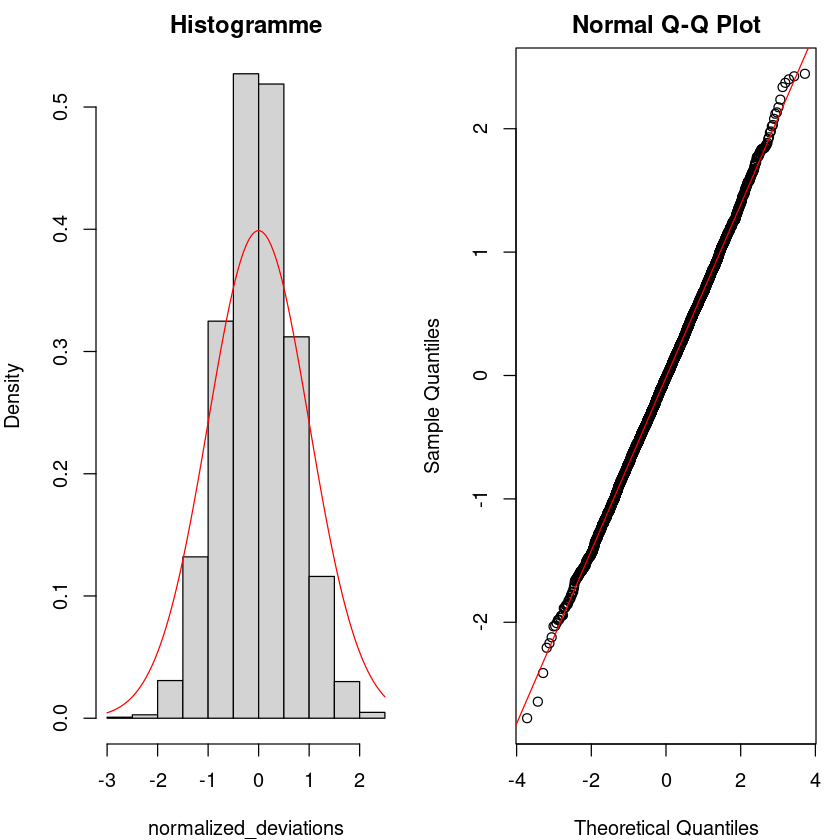

In [59]:
theta <- 1
n <- 1000

# Fonction pour calculer l'EMV
emv <- function(x) {
  sum_x <- sum(x)
  sum_x2 <- sum(x^2)
  return((-sum_x + sqrt(sum_x^2 + 4*length(x)*sum_x2)) / (2*length(x)))
}

fisher_info <- 1.5 * n / theta^2

seq(10, 2000, by = 1)
for (i in 1:2000) {
  x <- rnorm(n, mean=theta, sd=theta)
  normalized_deviations[i] <- sqrt(fisher_info) * (emv(x) - theta)
}


par(mfrow=c(1,2), mar=c(4,4,2,1))

hist(normalized_deviations, freq=FALSE, main="Histogramme")
curve(dnorm(x), col="red", add=TRUE)

qqnorm(normalized_deviations)
qqline(normalized_deviations, col="red")

**Ex9** Donner les intervalles de confiance de niveau 0.90 pour le paramètre $\theta$.

**Ex10.** Pour $n$ donné, simuler 500 échantillons et obtener des intervalles de confiance. Compter le nombre de fois où l'intervalle contient le vrai paramètre. Quelle est votre conclusion?